In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
df=pd.read_csv("E:/BaiduNetdiskDownload/credit card/creditcard.csv")

In [3]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploring

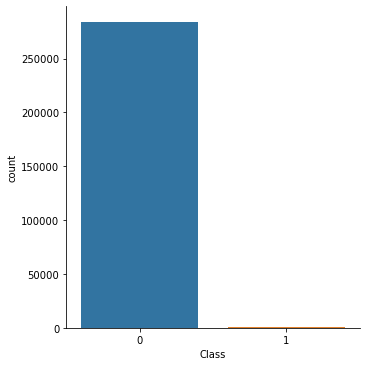

In [5]:
sns.catplot(x="Class",kind="count",data=df)

In [6]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

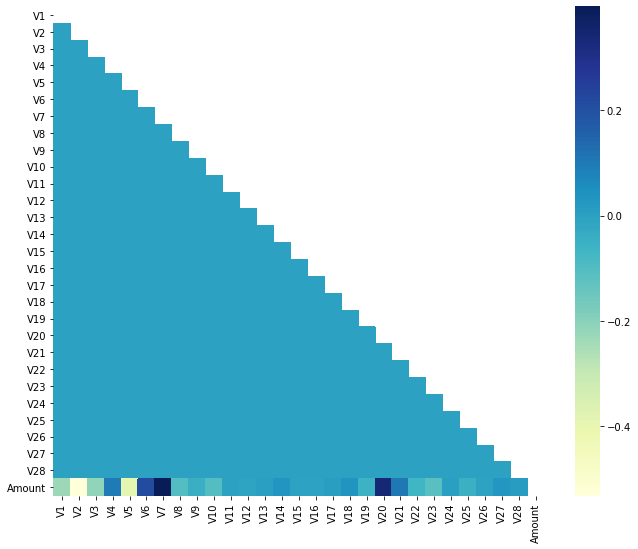

In [7]:
v_s=df.drop(["Time","Class"],axis=1)

mask=np.zeros_like(v_s.corr())
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(v_s.corr(),mask=mask,cmap="YlGnBu",ax=ax)

<Figure size 432x288 with 0 Axes>

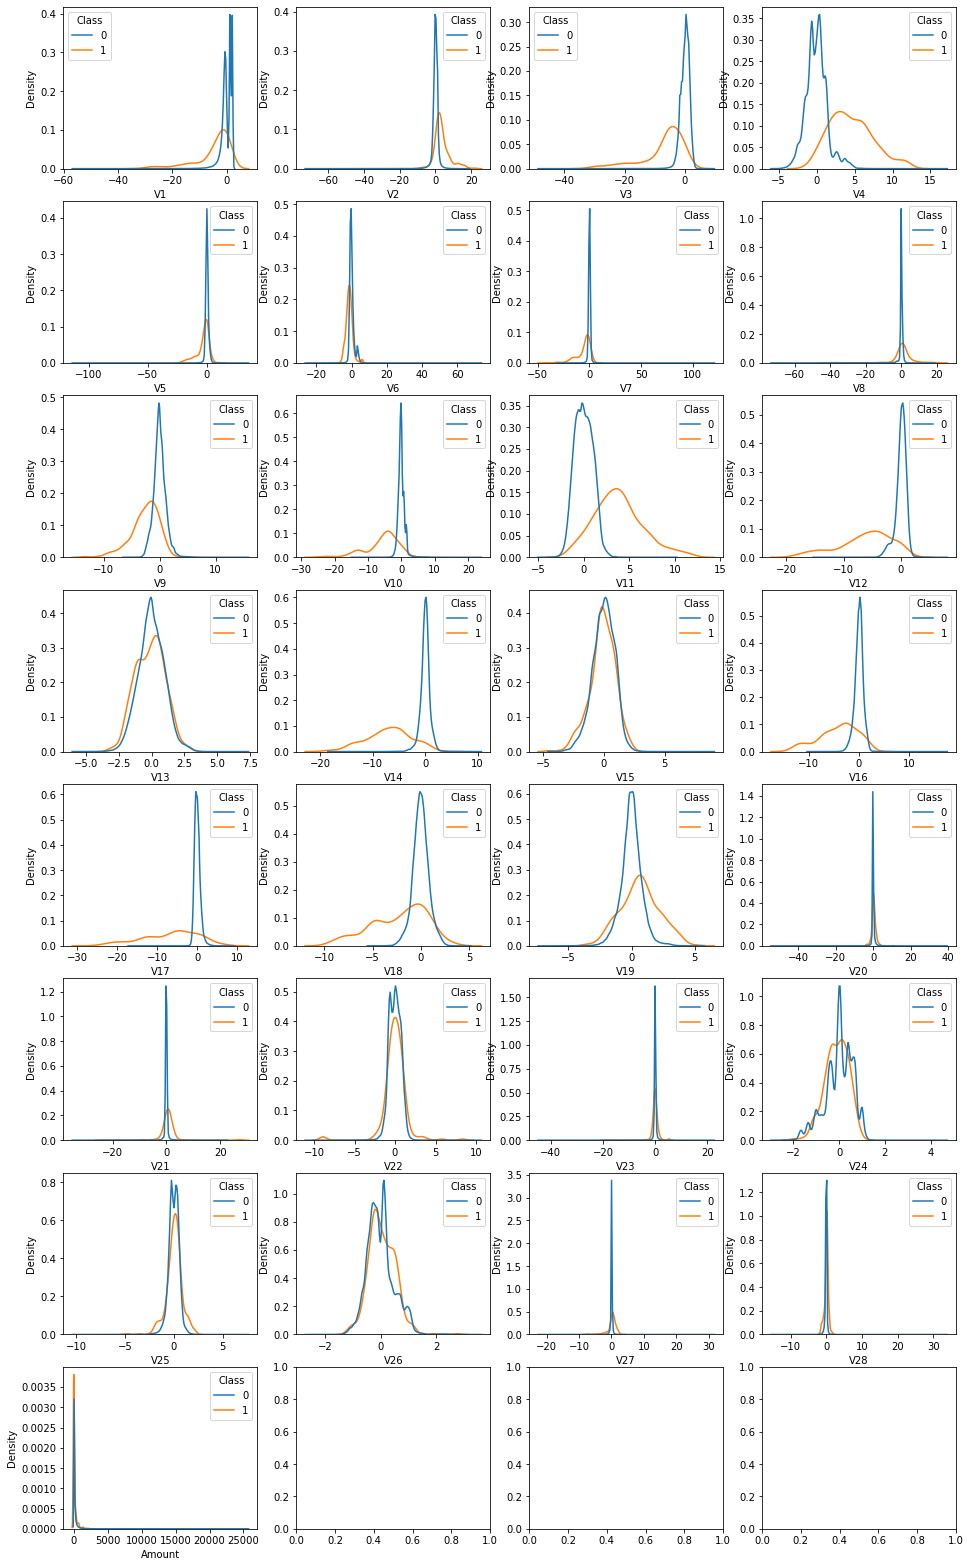

In [8]:
plt.figure()
i=0
fig, ax = plt.subplots(8,4,figsize=(16,28))
for feature in v_s:
    i=i+1
    plt.subplot(8,4,i)
    sns.kdeplot(data=df,x=feature,hue="Class",common_norm=False)

In [9]:
def trans_log(amt):
    if amt > 0 :
        amt=np.log(amt)
    else:
        amt
    return amt
df["log_amount"]=df["Amount"].apply(trans_log)

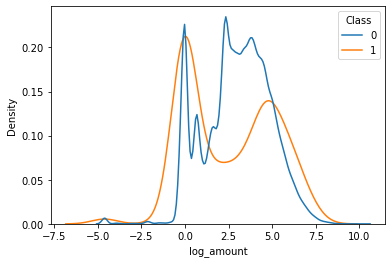

In [10]:
sns.kdeplot(data=df,x="log_amount",common_norm=False,hue="Class")

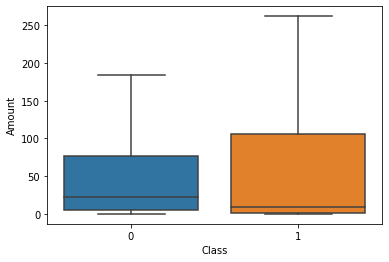

In [11]:
sns.boxplot(data=df,x="Class",y="Amount",showfliers=False)

# Oversamplig Modelling

In [12]:
from imblearn.over_sampling import SMOTE

In [31]:
X=df.drop(["Class","Time","Amount"],axis=1)
y=df["Class"]

In [32]:
X.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,log_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008099
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989541
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639


In [33]:
sampler=SMOTE(sampling_strategy=1)
X_os,y_os=sampler.fit_sample(X,y)

In [34]:
print(y_os.value_counts())

1    284315
0    284315
Name: Class, dtype: int64


In [35]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scalar=MinMaxScaler()
X=scalar.fit_transform(X_os)

### Logistic Regression

#### We may shuffle the dataframe before fit them into model

In [42]:
from sklearn.utils import shuffle
df_shuffle=shuffle(df,random_state=123)

In [53]:
from sklearn.model_selection import cross_val_score
lr=LogisticRegression(max_iter=1000)
print(cross_val_score(lr,X_os,y_os,scoring="recall").mean())

0.9163603749362501


In [58]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.01,0.1,1,10,100]}
lr_grid=GridSearchCV(lr, param_grid=param_grid,n_jobs=-1)
lr_grid.fit(X_os,y_os)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [60]:
print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.9431528410389884
{'C': 10}


In [97]:
#lr_grid.cv_results_

In [99]:
y_pred_os=lr.fit(X_os,y_os).predict(X_os)

confusion_matrix(y_os, y_pred_os)

array([[277456,   6859],
       [ 24042, 260273]], dtype=int64)

In [100]:
260273/(260273+24042)

0.9154388618257918

# Undersampling Model

In [66]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,log_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989541
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816241
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248352


In [62]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [64]:
t0=df[df["Class"]==0]
t1=df[df["Class"]==1]
print(len(t0))
print(len(t1))

284315
492


In [67]:
under_t0=t0.sample(n=len(t1))

In [76]:
under_sample_df=shuffle(pd.concat([under_t0,t1]),random_state=123)

In [77]:
X_us=under_sample_df.drop(["Class","Time","Amount"],axis=1)
y_us=under_sample_df["Class"]

In [79]:
X_us=scalar.fit_transform(X_us)

In [96]:
lr=LogisticRegression(max_iter=1000)
print(cross_val_score(lr,X_us,y_us,scoring="recall"))

[0.86734694 0.81632653 0.87878788 0.86868687 0.84693878]


In [90]:
y_pred_us=lr.fit(X_us,y_us).predict(X_us)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_us, y_pred_us)

In [95]:
428/(428+64)

0.8699186991869918

#### Obviously we can tell the r2 score is lower than that with SMOTE oversampling, due to the lack of data

### Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
forest=RandomForestClassifier()
print(cross_val_score(forest,X_os,y_os,scoring="recall",n_jobs=-1).mean())

1.0


In [105]:
cross_val_score(forest,X_os,y_os,scoring="recall",n_jobs=-1)

array([1., 1., 1., 1., 1.])

In [106]:
y_pred_forst=forest.fit(X_os,y_os).predict(X_os)

In [107]:
confusion_matrix(y_os, y_pred_forst)

array([[284315,      0],
       [     0, 284315]], dtype=int64)

In [108]:
y_pred_forst_=forest.fit(X_us,y_us).predict(X_us)

In [109]:
confusion_matrix(y_us, y_pred_forst_)

array([[492,   0],
       [  0, 492]], dtype=int64)